### Solucionadores

In [18]:
toMap = If[Length[#] == 0, {#}, #] & ;

In [19]:
solver[eqs_, func_, var_, iCondtions_, {t0_, tf_, dt_}] := 
 Module[{time, sol},
  time = Range[t0, tf, dt];
  sol = NDSolve[{eqs, iCondtions}, toMap[func], {var, t0, tf}];
  sol =  Map[#[var] /. sol[[1]] /. var -> time &, toMap[func]];
  Join[{time}, sol]]

In [20]:
solverD[eqs_, func_, var_, iCondtions_, {t0_, tf_, dt_}] := 
 Module[{time, soleq, sol, funcD, solD},
  time = Range[t0, tf, dt];
  funcD = Map[D[#[var], var] &, toMap[func]];
  
  soleq = NDSolve[Flatten@{eqs, iCondtions}, func, {var, t0, tf}];
  sol =  Map[#[var] /. soleq[[1]] /. var -> time &, toMap[func]];
  solD =  Map[# /. soleq[[1]] /. var -> time &, funcD];
  Join[{time}, sol, solD]]

# Caida libre

In [21]:
eqs = {x'[t] == dx[t],
   	dx'[t] == - 9.81};
ci = {x[0] == 0, dx[0] == 50};
{time, y, vy} = solver[eqs, {x, dx}, t, ci, {0, 15, .1}];

eqs = {x''[t] == - 9.81};
ci = {x[0] == 0, x'[0] == 50};
{timeD, yD, vyD} = solverD[eqs, x, t, ci, {0, 15, .1}];

In [31]:
grOpts1 = {PlotTheme -> "Scientific", FrameLabel -> {"t", "y[t]"}, 
   ImageSize -> Medium};
grOpts2 = {PlotTheme -> "Scientific", FrameLabel -> {"y[t]", "y'[t]"},
    ImageSize -> Medium};

data1 = Table[Row[{
   ListPlot[Transpose[{time, y}][[1 ;; j]], 
    PlotRange -> {MinMax[time, .1], MinMax[y, .1]}, Evaluate[grOpts1]],
   ListPlot[Transpose[{y, vy}][[1 ;; j]], 
    PlotRange -> {MinMax[y, .1], MinMax[vy, .1]}, Evaluate[grOpts2]]}],
 {j, 1, Length[time], 1}];

data2 = Table[Row[{
   ListPlot[Transpose[{timeD, yD}][[1 ;; j]], 
    PlotRange -> {MinMax[timeD, .1], MinMax[yD, .1]}, 
    Evaluate[grOpts1]],
   ListPlot[Transpose[{yD, vyD}][[1 ;; j]], 
    PlotRange -> {MinMax[yD, .1], MinMax[vyD, .1]}, 
    Evaluate[grOpts2]]}],
 {j, 1, Length[time], 1}];

In [36]:
Export["CaidaLibre.gif",data1, "DisplayDurations" -> .15, "AnimationRepetitions" -> \[Infinity]]
Export["CaidaLibreD.gif",data2, "DisplayDurations" -> .15, "AnimationRepetitions" -> \[Infinity]]

CaidaLibre.gif
CaidaLibreD.gif

# Pendulo físico y armónico

In [38]:
grOpts1 = {PlotTheme->"Scientific",FrameLabel->{"t","\[Theta][t]"},ImageSize->Medium};
grOpts2 = {PlotTheme->"Scientific",FrameLabel->{"\[Theta][t]","\[Theta]'[t]"},ImageSize->Medium};
grOpts3 = {PlotTheme->"Scientific",FrameLabel->{"x[t]","y[t]"},ImageSize->Medium};

In [41]:
g = 9.81;ell = 5;
time  = {0,2*Pi*Sqrt[ell/g],.01}

eqsReal = {th'[t] == dth[t],
	dth'[t] == - (g/ell)*Sin[th[t]]};

eqsSimple = {th'[t] == dth[t],
	dth'[t] == - (g/ell)*th[t]};
ci ={th[0]==-Pi/4,dth[0]==0};

{tt,\[Theta]1,d\[Theta]1} = solver[eqsReal,{th,dth},t,ci,time];
{tt,\[Theta]2,d\[Theta]2} = solver[eqsSimple,{th,dth},t,ci,time];

{0, 4.4857, 0.01}

In [48]:
data = Table[Row[{
   ListPlot[{Transpose[{tt, \[Theta]1}][[1 ;; j]], 
     Transpose[{tt, \[Theta]2}][[1 ;; j]]},
    		PlotRange -> {MinMax[tt, .1], 
      MinMax[Flatten[{\[Theta]1, \[Theta]2}], .1]}, Evaluate[grOpts1]],
   ListPlot[{Transpose[{\[Theta]1, d\[Theta]1}][[1 ;; j]], 
     Transpose[{\[Theta]2, d\[Theta]2}][[1 ;; j]]}, AspectRatio -> 1,
                    
    PlotRange -> {MinMax[Flatten[{\[Theta]1, \[Theta]2}], .1], 
      MinMax[Flatten[{d\[Theta]1, d\[Theta]2}], .1]}, 
    Evaluate[grOpts2]],
   ListPlot[
    ell*Transpose[{Sin[#], -Cos[#]}] & /@ {\[Theta]1, \[Theta]2}[[;; ,
        1 ;; j]],
                  PlotRange -> ell*{{-1, 1}, {-1, .01}}, 
    AspectRatio -> 1, Evaluate[grOpts3],
                  
    Epilog -> { Orange, 
      Arrow[{{0, 0}, 
        ell*{Sin[\[Theta]1[[j]]], -Cos[\[Theta]1[[j]] ]}}],
                                    Blue, 
      Arrow[{{0, 0}, 
        ell*{Sin[\[Theta]2[[j]]], -Cos[\[Theta]2[[j]] ]}}]}]
   }], {j, 1, Length[tt], 1}];
   
Export["Pendulos.gif",data, "DisplayDurations" -> .15, "AnimationRepetitions" -> \[Infinity]]

Pendulos.gif

# Péndulo y resorte

In [51]:
g  =9.81; ell = 10;
w0 = 5;
time  = {0,2*Pi*Sqrt[ell/g],.01}

{0, 6.34374, 0.01}

{r'[t] == dr[t], th'[t] == dth[t], dr'[t] == 
 
                                              2
>    -9.81 (1 - Cos[th[t]]) - 25 r[t] + dth[t]  (10 + r[t]), 
 
               -2 dr[t] dth[t] - 9.81 Sin[th[t]]
>   dth'[t] == ---------------------------------}
                           10 + r[t]
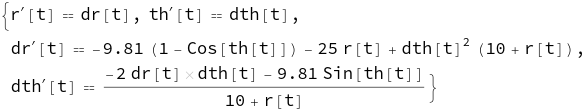

In [54]:
eqs = {r'[t] == dr[t],
  	th'[t] == dth[t],
  	dr'[t] == ((ell + r[t])*dth[t]^2 - w0^2*r[t] - 
     g (1 - Cos[th[t]])),
  	dth'[t] == -(2*dth[t]*dr[t] + g*Sin[th[t]])/(ell + r[t])}

ci = {th[0] == -Pi/4, dth[0] == 0, r[0] == 0, dr[0] == 0};
{tt, s, ds, \[Theta], d\[Theta]} = 
  solver[eqs, {r, dr, th, dth}, t, ci, time];

In [57]:
data = Table[Row[{
	Column[{
		ListPlot[Transpose[{tt,s}][[1;;j]],
		PlotRange->{MinMax[tt,.1],MinMax[s,.1]},
		PlotTheme->"Scientific",FrameLabel->{"t","s[t]"},ImageSize->Medium],
	ListPlot[Transpose[{tt,\[Theta]}][[1;;j]],
		PlotRange->{MinMax[tt,.1],MinMax[\[Theta],.1]},
		PlotTheme->"Scientific",FrameLabel->{"t","\[Theta][t]"},ImageSize->Medium]
}],
	Column[{
		ListPlot[Transpose[{s,ds}][[1;;j]],
		PlotRange->{MinMax[s,.1],MinMax[ds,.1]},
		PlotTheme->"Scientific",FrameLabel->{"s[t]","ds[t]"},ImageSize->Medium],
	ListPlot[Transpose[{\[Theta],d\[Theta]}][[1;;j]],
		PlotRange->{MinMax[\[Theta],.1],MinMax[d\[Theta],.1]},
		PlotTheme->"Scientific",FrameLabel->{"\[Theta][t]","d\[Theta][t]"},ImageSize->Medium]
}],
ListPlot[((ell+s)*Transpose[{Sin[\[Theta]],-Cos[\[Theta]]}])[[1;;j]],
PlotRange->(ell+Max[s]+.1)*{{-1,1},{-1,.01}},AspectRatio->1,
PlotTheme->"Scientific",FrameLabel->{"x","y"},ImageSize->Medium,
Epilog->{ Orange,Arrow[{{0,0},(ell+s[[j]])*{Sin[\[Theta][[j]]],-Cos[\[Theta][[j]] ]}}]}
]
}],
{j,1,Length[tt],1}];

Export["PendukloResorte.gif",data, "DisplayDurations" -> .15, "AnimationRepetitions" -> \[Infinity]]

PendukloResorte.gif

In [60]:
Export["PendukloResorte.gif",data, "DisplayDurations" -> .05, "AnimationRepetitions" -> \[Infinity]]

PendukloResorte.gif